In [1]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
import os

# F.F

In [5]:
    
import pickle

# Load the list from the file
with open('Frames Output/FF/ff.pkl', 'rb') as file:
    output_ff = pickle.load(file)


num_molecules = len(output_ff)
times = []
dynamics = []
photons = []
for m in range(num_molecules):
    times.append( output_ff[m][0])
    dynamics.append( output_ff[m][1])
    photons.append( output_ff[m][3])

In [10]:
rate_01 = photons[0].mean()/1e-2
excitation_P, excitation_wavelength = 1,647 
N_A,h,c=6.022e23,6.626e-34,3e8
constant_factor = (10**-6 * np.log(10)) / (N_A * h * c)
epsilon = rate_01  /(excitation_P * excitation_wavelength * constant_factor) 
epsilon 

238780.26637246553

In [6]:
# Directory to save images
save_dir = "/home/lenoco/Documents I3S/Redaction/Meetings Morpheme/Presentation Morpheme 12_09/FF/frames_evolution"
os.makedirs(save_dir, exist_ok=True)

s,e = 0,45
for i in range(6):
    # Dynamics plot with zoomed-in inset
    fig, ax = plt.subplots(figsize=(10, 6))

    # Main plot
    ax.step(times[i][s:e], dynamics[i][s:e], where='post')

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('State')
    ax.set_title(f'Molecule{i}')
    ax.set_yticks([0, 1,2])
    ax.set_yticklabels(['S0','S1',  'B'])

    # Saving the plot
    plt.savefig(f"{save_dir}/molecule_{i}.png")
    plt.close()

In [13]:
frames_ff_poisson = np.load("Frames Output/FF/frames_ff_poisson_lower_laser.npy")

In [14]:


# Determine the maximum possible value for the colorbar
vmax = frames_ff_poisson.max()

# Directory to save images
save_dir = "Frames Output/FF/frames_evolution_lower_laser"
os.makedirs(save_dir, exist_ok=True)
# Create the plot for every 10th frame
for frame in range(1, frames_ff_poisson.shape[0], 10):
    # Create subplots with 1 big plot for the image and a 1x3 grid for the line plots
    fig = make_subplots(
        rows=1, cols=4,
        column_widths=[0.5, 0.15, 0.15, 0.15],
        specs=[[{"type": "heatmap"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=[f'Frame {frame}', f'Molecule 1', f'Molecule 2', f'Molecule 3']
    )

    # Add the heatmap for the frame
    fig.add_trace(
        go.Heatmap(z=frames_ff_poisson[frame], 
                   colorscale='Gray', 
                   zmin=0, 
                   zmax=vmax, 
                   colorbar=dict(title="Intensity")),
        row=1, col=1
    )

    # Add the photon evolution plots for the three molecules
    for m in range(3):
        fig.add_trace(
            go.Scatter(x=list(range(frame + 1)), y=photons[m][:frame + 1], mode='lines'),
            row=1, col=m + 2
        )
        fig.update_xaxes(range=[0, frames_ff_poisson.shape[0]], row=1, col=m + 2)
        fig.update_yaxes(range=[0,np.max(photons) ], row=1, col=m + 2)

    # Update layout and remove legends
    fig.update_layout(
        height=600, 
        width=1200, 
        showlegend=False,  # Remove the legends
        title_text=f'Fluorescence Fluctuations Simulation (Frame {frame})'
    )

    fig.write_image(f"{save_dir}/frame_{frame}.png")



In [15]:
from PIL import Image
import os



# List all image files in the directory
images = [f"{save_dir}/{img}" for img in sorted(os.listdir(save_dir)) if img.endswith(".png")]

# Open images and append them to a list
frames = [Image.open(image) for image in images]

# Save the frames as a GIF
gif_path = f"{save_dir}/animation.gif"
frames[0].save(gif_path, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=100,  # Duration in milliseconds per frame
               loop=0)  # Loop count (0 for infinite)

print(f"GIF saved at {gif_path}")


GIF saved at Frames Output/FF/frames_evolution_lower_laser/animation.gif


In [17]:
import numpy as np
from PIL import Image
import tifffile

# Step 1: Load the .pny file (assuming it's a numpy array for this example)
# Replace this with the correct loading function for your specific .pny format.
data = np.load('Frames Output/FF/frames_ff_poisson_lower_laser.npy')  # Adjust this to match your actual file format



# Step 2: Ensure the data is in the right format for an image
# If your array is not 2D or 3D, you may need to reshape or process it here.

# Step 3: Save the data as a TIFF file

# Option 1: Using PIL (for simple 2D images)
image = Image.fromarray(data)
image.save('output_image.tiff')

# Option 2: Using tifffile (for more complex images, including multi-page TIFFs)
tifffile.imwrite('output_image.tiff', data)




TypeError: Cannot handle this data type: (1, 1, 128), <f8

# Blinking

In [15]:
    
import pickle

# Load the list from the file
with open('Frames Output/Blinking/blinking.pkl', 'rb') as file:
    output_ff = pickle.load(file)


num_molecules = len(output_ff)
times = []
dynamics = []
photons = []
for m in range(num_molecules):
    times.append( output_ff[m][0])
    dynamics.append( output_ff[m][1])
    photons.append( output_ff[m][3])

In [17]:
frames_blinking_poisson = np.load("Frames Output/Blinking/frames_blinking_poisson.npy")
frames_blinking_poisson.max()

70.0

In [13]:


# Determine the maximum possible value for the colorbar
vmax = frames_blinking_poisson.max()

# Directory to save images
save_dir = "Frames Output/Blinking/frames_evolution"
os.makedirs(save_dir, exist_ok=True)
# Create the plot for every 10th frame
for frame in range(1, frames_blinking_poisson.shape[0], 10):
    # Create subplots with 1 big plot for the image and a 1x3 grid for the line plots
    fig = make_subplots(
        rows=1, cols=4,
        column_widths=[0.5, 0.15, 0.15, 0.15],
        specs=[[{"type": "heatmap"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=[f'Frame {frame}', f'Molecule 1', f'Molecule 2', f'Molecule 3']
    )

    # Add the heatmap for the frame
    fig.add_trace(
        go.Heatmap(z=frames_blinking_poisson[frame], 
                   colorscale='Gray', 
                   zmin=0, 
                   zmax=vmax, 
                   colorbar=dict(title="Intensity")),
        row=1, col=1
    )

    # Add the photon evolution plots for the three molecules
    for m in range(3):
        fig.add_trace(
            go.Scatter(x=list(range(frame + 1)), y=photons[m][:frame + 1], mode='lines'),
            row=1, col=m + 2
        )
        fig.update_xaxes(range=[0, frames_blinking_poisson.shape[0]], row=1, col=m + 2)
        fig.update_yaxes(range=[0,np.max(photons) ], row=1, col=m + 2)

    # Update layout and remove legends
    fig.update_layout(
        height=600, 
        width=1200, 
        showlegend=False,  # Remove the legends
        title_text=f'Fluorescence Fluctuations Simulation (Frame {frame})'
    )

    fig.write_image(f"{save_dir}/frame_{frame}.png")



In [14]:
from PIL import Image
import os



# List all image files in the directory
images = [f"{save_dir}/{img}" for img in sorted(os.listdir(save_dir)) if img.endswith(".png")]

# Open images and append them to a list
frames = [Image.open(image) for image in images]

# Save the frames as a GIF
gif_path = f"{save_dir}/animation.gif"
frames[0].save(gif_path, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=100,  # Duration in milliseconds per frame
               loop=0)  # Loop count (0 for infinite)

print(f"GIF saved at {gif_path}")


GIF saved at Frames Output/Blinking/frames_evolution/animation.gif


# STORM

In [11]:
    
import pickle

# Load the list from the file
with open('Frames Output/STORM/storm.pkl', 'rb') as file:
    output_ff = pickle.load(file)


num_molecules = len(output_ff)
times = []
dynamics = []
photons = []
for m in range(num_molecules):
    times.append( output_ff[m][0])
    dynamics.append( output_ff[m][1])
    photons.append( output_ff[m][3])

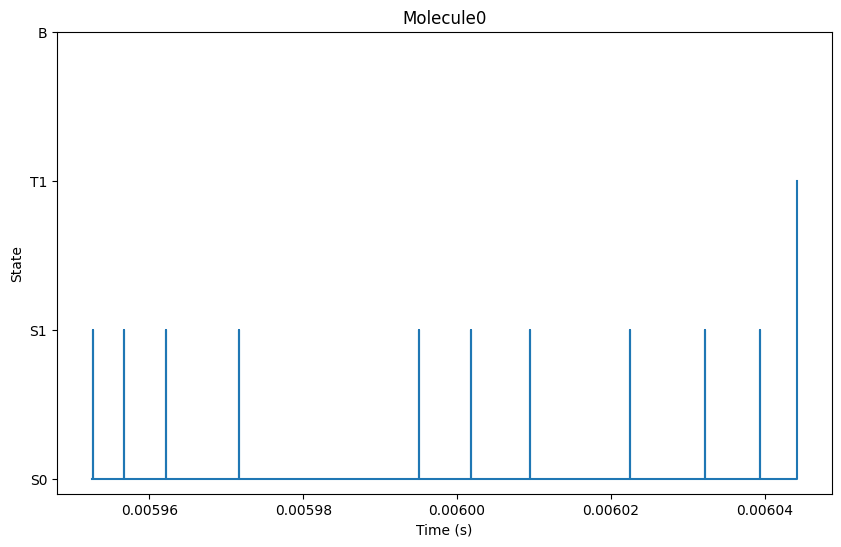

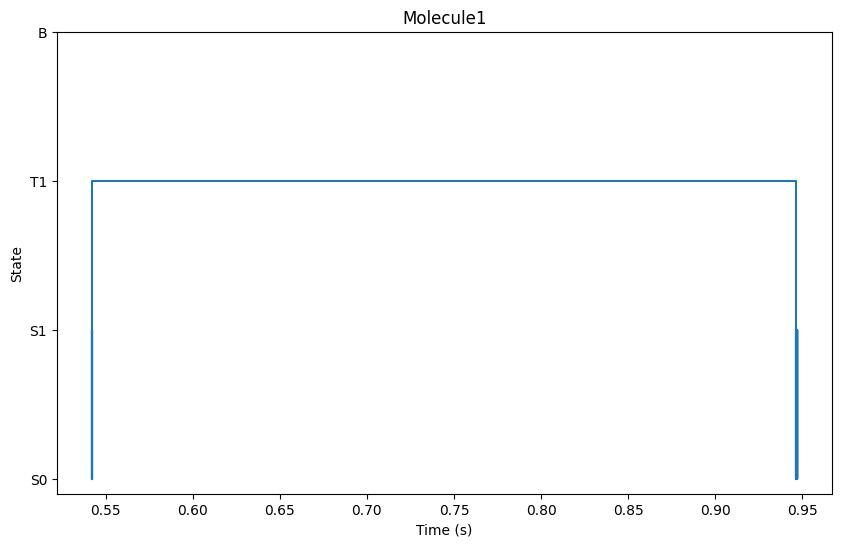

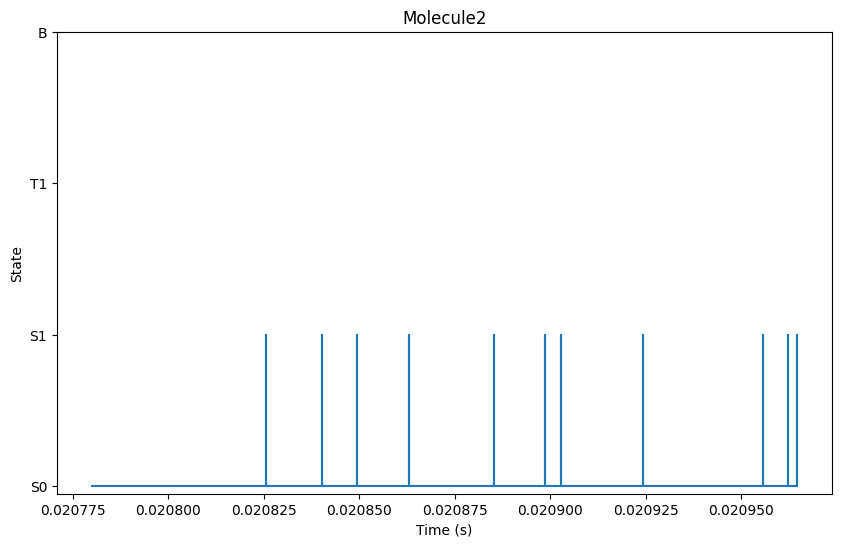

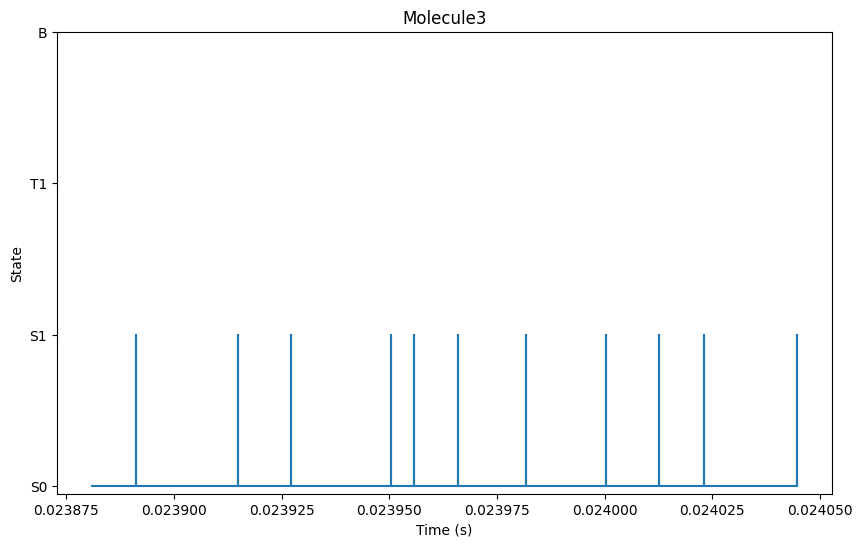

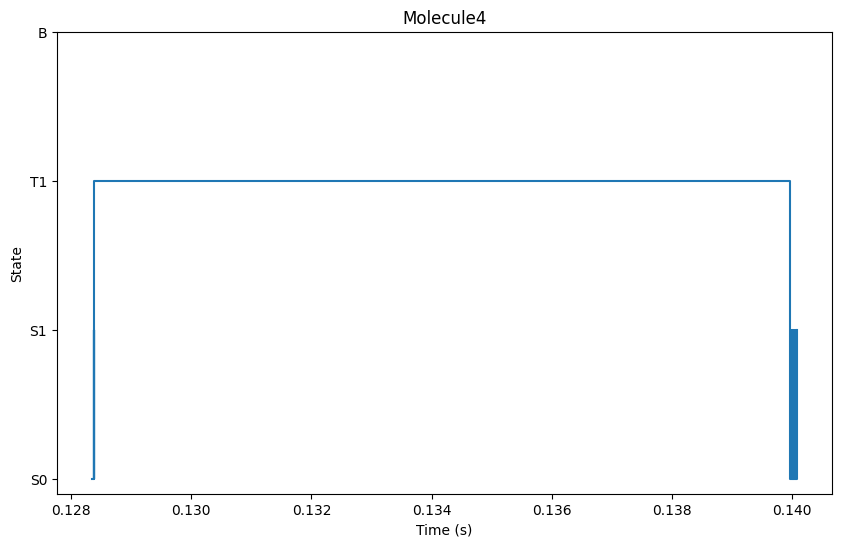

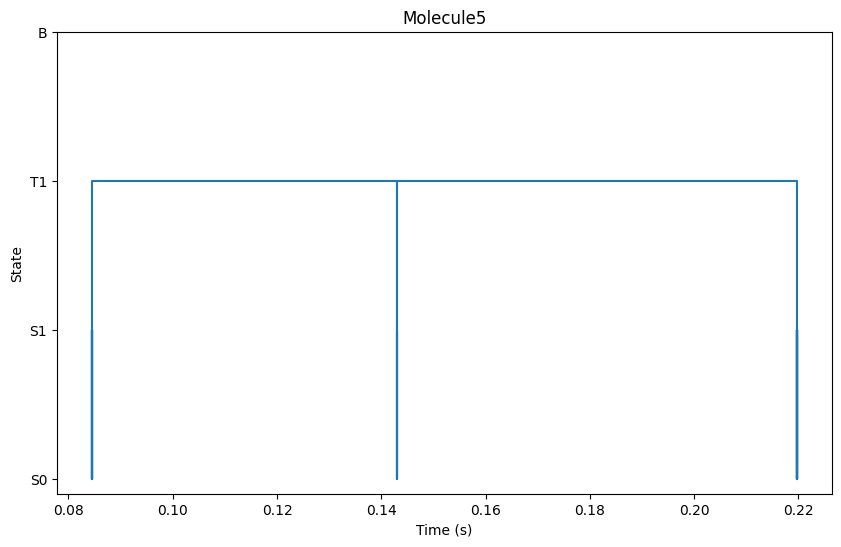

In [21]:
# Directory to save images
save_dir = "/home/lenoco/Documents I3S/Redaction/Meetings Morpheme/Presentation Morpheme 12_09/STORM/frames_evolution"
os.makedirs(save_dir, exist_ok=True)

s,e = 1,24
for i in range(6):
    # Dynamics plot with zoomed-in inset
    fig, ax = plt.subplots(figsize=(10, 6))

    # Main plot
    ax.step(times[i][s:e], dynamics[i][s:e], where='post')

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('State')
    ax.set_title(f'Molecule{i}')
    ax.set_yticks([0, 1,2,3])
    ax.set_yticklabels(['S0','S1','T1',  'B'])

    # Saving the plot
    plt.savefig(f"{save_dir}/molecule_{i}.png")
    plt.show()


In [4]:


# Determine the maximum possible value for the colorbar
vmax = frames_storm_poisson.max()

# Directory to save images
save_dir = "Frames Output/STORM/frames_evolution"
os.makedirs(save_dir, exist_ok=True)
# Create the plot for every 10th frame
for frame in range(1, frames_storm_poisson.shape[0], 10):
    if frame%100 == 0:
        print(frame)
    # Create subplots with 1 big plot for the image and a 1x3 grid for the line plots
    fig = make_subplots(
        rows=1, cols=4,
        column_widths=[0.5, 0.15, 0.15, 0.15],
        specs=[[{"type": "heatmap"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=[f'Frame {frame}', f'Molecule 1', f'Molecule 2', f'Molecule 3']
    )

    # Add the heatmap for the frame
    fig.add_trace(
        go.Heatmap(z=frames_storm_poisson[frame], 
                   colorscale='Gray', 
                   zmin=0, 
                   zmax=vmax, 
                   colorbar=dict(title="Intensity")),
        row=1, col=1
    )

    # Add the photon evolution plots for the three molecules
    for m in range(3):
        fig.add_trace(
            go.Scatter(x=list(range(frame + 1)), y=photons[m][:frame + 1], mode='lines'),
            row=1, col=m + 2
        )
        fig.update_xaxes(range=[0, frames_storm_poisson.shape[0]], row=1, col=m + 2)
        fig.update_yaxes(range=[0,np.max(photons) ], row=1, col=m + 2)

    # Update layout and remove legends
    fig.update_layout(
        height=600, 
        width=1200, 
        showlegend=False,  # Remove the legends
        title_text=f'Fluorescence Fluctuations Simulation (Frame {frame})'
    )

    fig.write_image(f"{save_dir}/frame_{frame}.png")



In [8]:
from PIL import Image
import os



# List all image files in the directory
images = [f"{save_dir}/{img}" for img in sorted(os.listdir(save_dir)) if img.endswith(".png")]

# Open images and append them to a list
frames = [Image.open(image) for image in images]

# Save the frames as a GIF
gif_path = f"{save_dir}/animation.gif"
frames[0].save(gif_path, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=100,  # Duration in milliseconds per frame
               loop=0)  # Loop count (0 for infinite)

print(f"GIF saved at {gif_path}")


GIF saved at Frames Output/STORM/frames_evolution/animation.gif


# PALM

In [22]:
    
import pickle

# Load the list from the file
with open('Frames Output/PALM/palm.pkl', 'rb') as file:
    output_ff = pickle.load(file)


num_molecules = len(output_ff)
times = []
dynamics = []
photons = []
for m in range(num_molecules):
    times.append( output_ff[m][0])
    dynamics.append( output_ff[m][1])
    photons.append( output_ff[m][3])

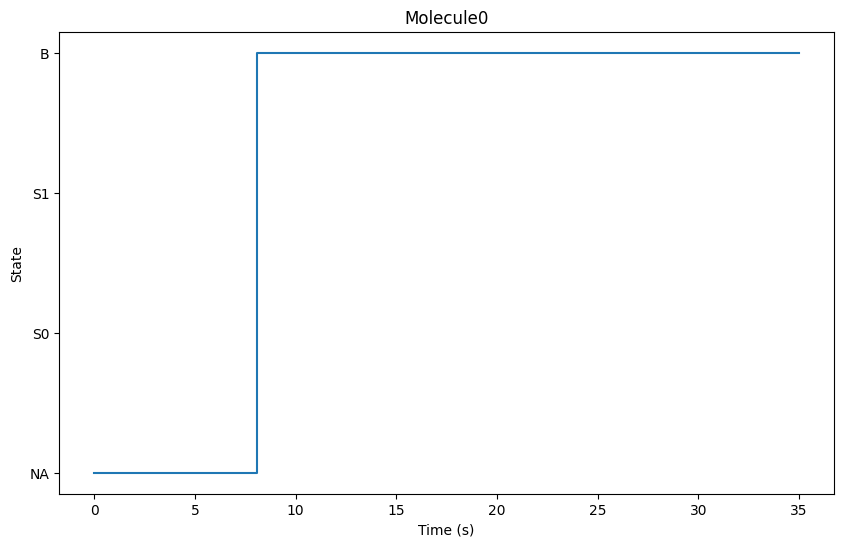

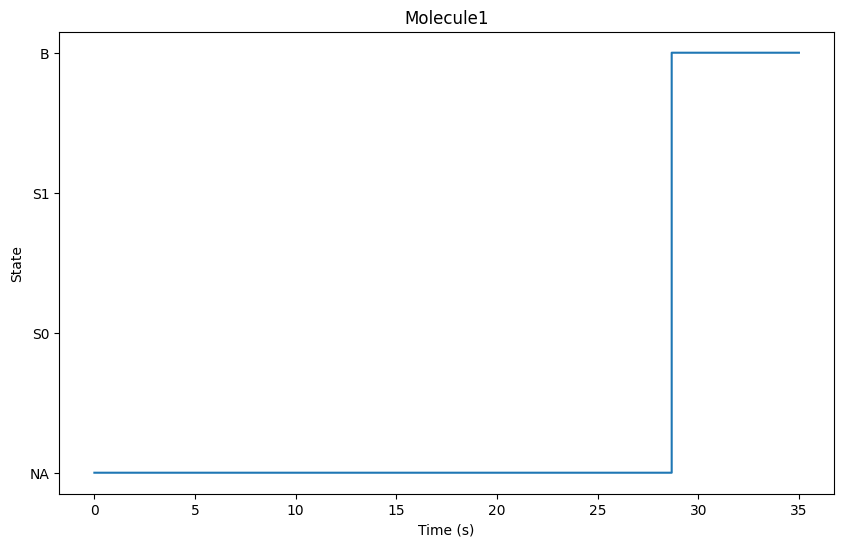

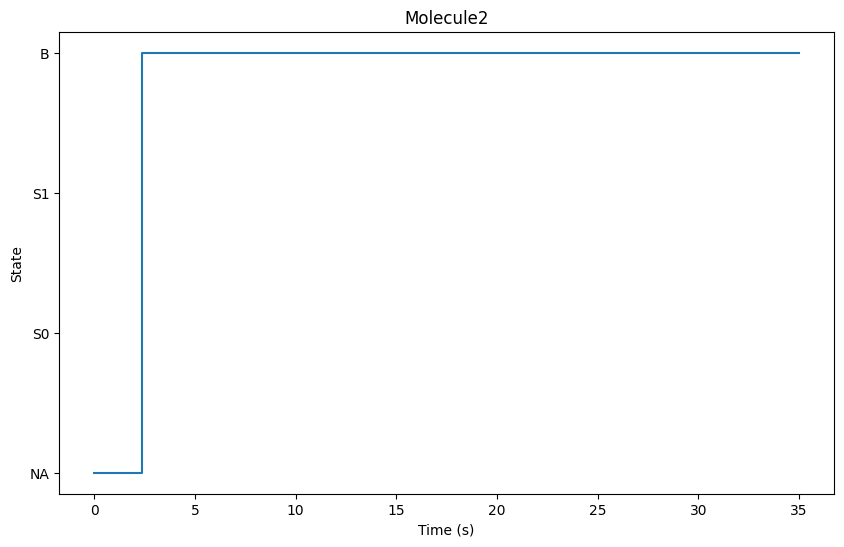

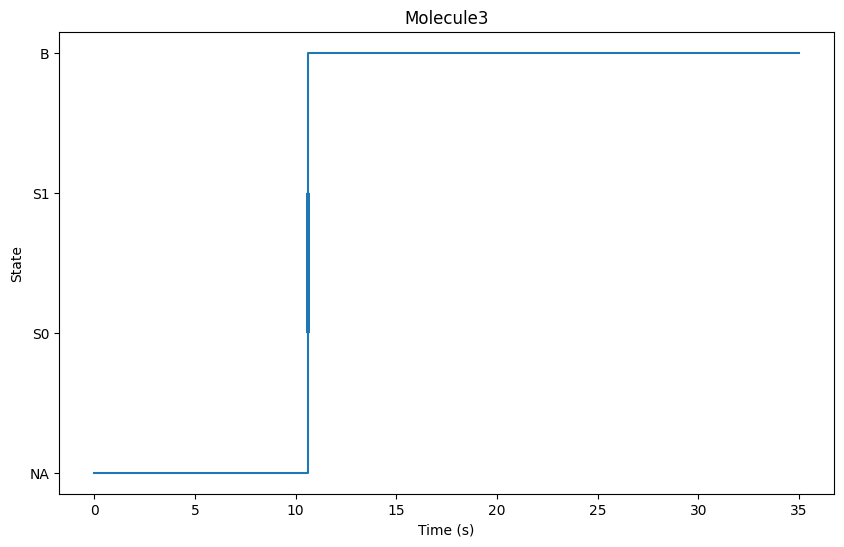

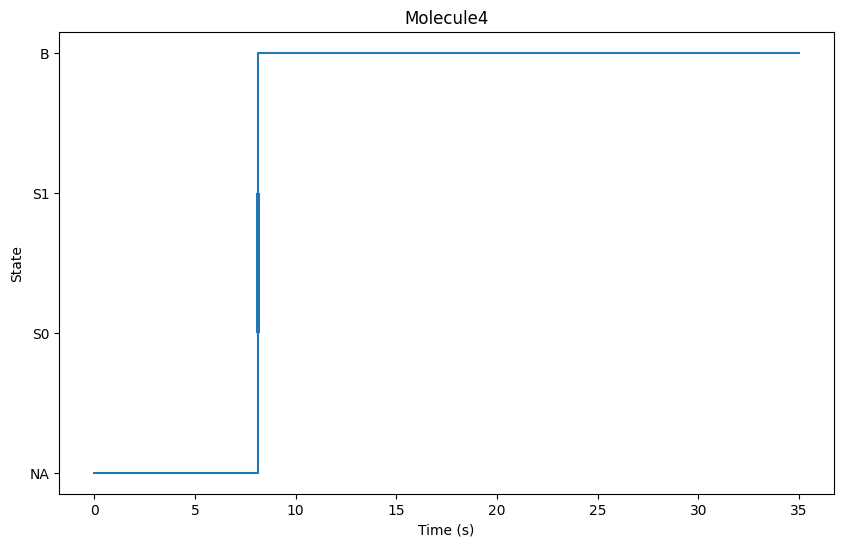

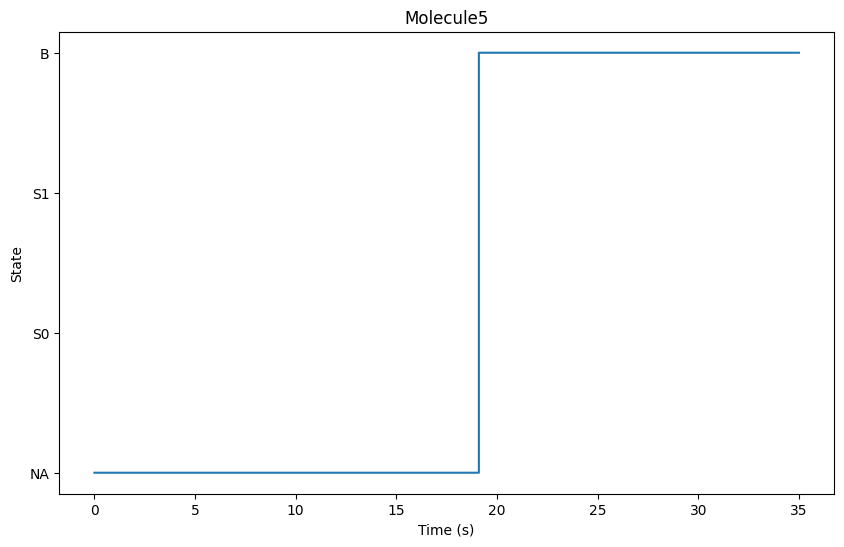

In [26]:
# Directory to save images
save_dir = "/home/lenoco/Documents I3S/Redaction/Meetings Morpheme/Presentation Morpheme 12_09/PALM/frames_evolution"
os.makedirs(save_dir, exist_ok=True)

s,e = 0,-1
for i in range(6):
    # Dynamics plot with zoomed-in inset
    fig, ax = plt.subplots(figsize=(10, 6))

    # Main plot
    ax.step(times[i][s:], dynamics[i][s:], where='post')

    ax.set_xlabel('Time (s)')
    ax.set_ylabel('State')
    ax.set_title(f'Molecule{i}')
    ax.set_yticks([-1,0, 1,2])
    ax.set_yticklabels(['NA','S0','S1',  'B'])

    # Saving the plot
    plt.savefig(f"{save_dir}/molecule_{i}.png")
    plt.show()


In [5]:


# Determine the maximum possible value for the colorbar
vmax = frames_palm_poisson.max()

# Directory to save images
save_dir = "Frames Output/PALM/frames_evolution"
os.makedirs(save_dir, exist_ok=True)
# Create the plot for every 10th frame
for frame in range(1, frames_palm_poisson.shape[0], 10):
    # Create subplots with 1 big plot for the image and a 1x3 grid for the line plots
    fig = make_subplots(
        rows=1, cols=4,
        column_widths=[0.5, 0.15, 0.15, 0.15],
        specs=[[{"type": "heatmap"}, {"type": "scatter"}, {"type": "scatter"}, {"type": "scatter"}]],
        subplot_titles=[f'Frame {frame}', f'Molecule 1', f'Molecule 2', f'Molecule 3']
    )

    # Add the heatmap for the frame
    fig.add_trace(
        go.Heatmap(z=frames_palm_poisson[frame], 
                   colorscale='Gray', 
                   zmin=0, 
                   zmax=vmax, 
                   colorbar=dict(title="Intensity")),
        row=1, col=1
    )

    # Add the photon evolution plots for the three molecules
    for m in range(3):
        fig.add_trace(
            go.Scatter(x=list(range(frame + 1)), y=photons[m][:frame + 1], mode='lines'),
            row=1, col=m + 2
        )
        fig.update_xaxes(range=[0, frames_palm_poisson.shape[0]], row=1, col=m + 2)
        fig.update_yaxes(range=[0,np.max(photons) ], row=1, col=m + 2)

    # Update layout and remove legends
    fig.update_layout(
        height=600, 
        width=1200, 
        showlegend=False,  # Remove the legends
        title_text=f'Fluorescence Fluctuations Simulation (Frame {frame})'
    )

    fig.write_image(f"{save_dir}/frame_{frame}.png")



In [6]:
from PIL import Image
import os



# List all image files in the directory
images = [f"{save_dir}/{img}" for img in sorted(os.listdir(save_dir)) if img.endswith(".png")]

# Open images and append them to a list
frames = [Image.open(image) for image in images]

# Save the frames as a GIF
gif_path = f"{save_dir}/animation.gif"
frames[0].save(gif_path, format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=100,  # Duration in milliseconds per frame
               loop=0)  # Loop count (0 for infinite)

print(f"GIF saved at {gif_path}")


GIF saved at Frames Output/PALM/frames_evolution/animation.gif


In [7]:
for j in range(500,3500):
    print (j , np.unique(frames_palm_poisson[j]))

500 [0.]
501 [0.]
502 [0.]
503 [0.]
504 [0.]
505 [0.]
506 [0.]
507 [0.]
508 [0.]
509 [0.]
510 [0.]
511 [0.]
512 [0.]
513 [0.]
514 [0.]
515 [0.]
516 [0.]
517 [0.]
518 [0.]
519 [0.]
520 [0.]
521 [ 0.  1.  2.  5.  8.  9. 11. 16. 84.]
522 [0.]
523 [0.]
524 [0.]
525 [0.]
526 [0.]
527 [0.]
528 [0.]
529 [0.]
530 [0.]
531 [0.]
532 [0.]
533 [0.]
534 [0.]
535 [0.]
536 [0.]
537 [0.]
538 [0.]
539 [0.]
540 [0.]
541 [0.]
542 [0.]
543 [0.]
544 [0.]
545 [0.]
546 [0.]
547 [0.]
548 [0.]
549 [0.]
550 [0.]
551 [0.]
552 [0.]
553 [0.]
554 [0.]
555 [0.]
556 [0.]
557 [0.]
558 [0.]
559 [0.]
560 [0.]
561 [0.]
562 [0.]
563 [0.]
564 [0.]
565 [0.]
566 [0.]
567 [0.]
568 [0.]
569 [0.]
570 [0.]
571 [0.]
572 [0.]
573 [0.]
574 [0.]
575 [0.]
576 [0.]
577 [0.]
578 [0.]
579 [0.]
580 [0.]
581 [0.]
582 [0.]
583 [0.]
584 [0.]
585 [0.]
586 [0.]
587 [0. 1.]
588 [0.]
589 [0.]
590 [0.]
591 [0.]
592 [0.]
593 [0.]
594 [0.]
595 [0.]
596 [0.]
597 [0.]
598 [0.]
599 [0.]
600 [0.]
601 [0.]
602 [0.]
603 [0.]
604 [  0.   1.   2.   6.  17